In [ ]:
# Set up environment
!pip install scanpy
!python -m pip uninstall -y matplotlib
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 70.2 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


Found existing installation: matplotlib 3.7.1
Uninstalling matplotlib-3.7.1:
  Successfully uninstalled matplotlib-3.7.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp310-cp310-linux_x86_64.whl
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires matplotlib>=3.2, but you have matplotlib 3.1.3 which is incompatible.
mizani 0.8.1 requires matplotlib>=3.5.0, but you have matplotlib 3.1.3 which is incompatible.
plotnine 0.10.1 requires matplotlib>=3.5.0, but you have matplotlib 3.1.3 which is incompatible.
scanpy 1.9.3 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.


In [ ]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
pd.set_option('display.max_rows', 500)

In [ ]:
# PIP-seq barnyard data
!wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE202nnn/GSE202911/suppl/GSE202911_JZ20210405_FR_3_filtered_matrix.zip
!unzip GSE202911_JZ20210405_FR_3_filtered_matrix.zip
barnyard     = sc.read_mtx("2_001_filtered_matrix/matrix.mtx").T
barnyard.obs = pd.read_csv("2_001_filtered_matrix/barcodes.tsv", header = None, sep = "\t")
barnyard.var = pd.read_csv("2_001_filtered_matrix/genes.tsv",    header = None, sep = "\t")
barnyard


--2023-05-12 21:33:39--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE202nnn/GSE202911/suppl/GSE202911_JZ20210405_FR_3_filtered_matrix.zip
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.13, 165.112.9.229, 2607:f220:41e:250::13, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17035541 (16M) [application/zip]
Saving to: ‘GSE202911_JZ20210405_FR_3_filtered_matrix.zip.2’

GSE202911_JZ2021040 100%[===================>]  16.25M  79.4MB/s    in 0.2s    

2023-05-12 21:33:39 (79.4 MB/s) - ‘GSE202911_JZ20210405_FR_3_filtered_matrix.zip.2’ saved [17035541/17035541]

Archive:  GSE202911_JZ20210405_FR_3_filtered_matrix.zip
replace 2_001_filtered_matrix/barcodes.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 2_001_filtered_matrix/genes.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace 2_001_filtered_matrix/matrix.mtx? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


AnnData object with n_obs × n_vars = 1595 × 114435
    obs: 0
    var: 0, 1

#Component 1

In [ ]:
barnyard

AnnData object with n_obs × n_vars = 1595 × 114435
    obs: 0
    var: 0, 1

In [ ]:
#barnyard.var

#Determining Rate of Multiplets

In [ ]:
genes = barnyard.var[1]
hg_genes = []
mm_genes =[]

for i in genes:
  if i.startswith('hg'):
    hg_genes.append(i)
  elif i.startswith('mm'):
    mm_genes.append(i)
  else:
    continue

print(hg_genes)
print(mm_genes)

['hg_DDX11L1', 'hg_WASH7P', 'hg_MIR6859-1', 'hg_MIR1302-2HG', 'hg_MIR1302-2', 'hg_FAM138A', 'hg_OR4G4P', 'hg_OR4G11P', 'hg_OR4F5', 'hg_AL627309.1', 'hg_AL627309.3', 'hg_CICP27', 'hg_AL627309.6', 'hg_AL627309.7', 'hg_AL627309.2', 'hg_AL627309.5', 'hg_RNU6-1100P', 'hg_AL627309.4', 'hg_FO538757.1', 'hg_WASH9P', 'hg_AP006222.1', 'hg_AP006222.2', 'hg_RPL23AP24', 'hg_AL732372.1', 'hg_AL732372.2', 'hg_WBP1LP7', 'hg_OR4F29', 'hg_CICP7', 'hg_AL732372.3', 'hg_AL669831.3', 'hg_AC114498.1', 'hg_MTND1P23', 'hg_MTND2P28', 'hg_MTCO1P12', 'hg_AC114498.2', 'hg_MTCO2P12', 'hg_MTATP8P1', 'hg_MTATP6P1', 'hg_MTCO3P12', 'hg_WBP1LP6', 'hg_CICP3', 'hg_AL669831.1', 'hg_RNU6-1199P', 'hg_AL669831.2', 'hg_LINC01409', 'hg_AL669831.6', 'hg_AL669831.4', 'hg_FAM87B', 'hg_LINC01128', 'hg_LINC00115', 'hg_FAM41C', 'hg_TUBB8P11', 'hg_AL669831.5', 'hg_AL645608.6', 'hg_AL645608.2', 'hg_AL645608.4', 'hg_LINC02593', 'hg_SAMD11', 'hg_NOC2L', 'hg_KLHL17', 'hg_PLEKHN1', 'hg_PERM1', 'hg_AL645608.7', 'hg_HES4', 'hg_ISG15', 'hg_AL

In [ ]:
print(len(hg_genes))
print(len(mm_genes))
print(hg_genes)
#a = hg_genes.unique()
#print(len(a))

60179
54256
['hg_DDX11L1', 'hg_WASH7P', 'hg_MIR6859-1', 'hg_MIR1302-2HG', 'hg_MIR1302-2', 'hg_FAM138A', 'hg_OR4G4P', 'hg_OR4G11P', 'hg_OR4F5', 'hg_AL627309.1', 'hg_AL627309.3', 'hg_CICP27', 'hg_AL627309.6', 'hg_AL627309.7', 'hg_AL627309.2', 'hg_AL627309.5', 'hg_RNU6-1100P', 'hg_AL627309.4', 'hg_FO538757.1', 'hg_WASH9P', 'hg_AP006222.1', 'hg_AP006222.2', 'hg_RPL23AP24', 'hg_AL732372.1', 'hg_AL732372.2', 'hg_WBP1LP7', 'hg_OR4F29', 'hg_CICP7', 'hg_AL732372.3', 'hg_AL669831.3', 'hg_AC114498.1', 'hg_MTND1P23', 'hg_MTND2P28', 'hg_MTCO1P12', 'hg_AC114498.2', 'hg_MTCO2P12', 'hg_MTATP8P1', 'hg_MTATP6P1', 'hg_MTCO3P12', 'hg_WBP1LP6', 'hg_CICP3', 'hg_AL669831.1', 'hg_RNU6-1199P', 'hg_AL669831.2', 'hg_LINC01409', 'hg_AL669831.6', 'hg_AL669831.4', 'hg_FAM87B', 'hg_LINC01128', 'hg_LINC00115', 'hg_FAM41C', 'hg_TUBB8P11', 'hg_AL669831.5', 'hg_AL645608.6', 'hg_AL645608.2', 'hg_AL645608.4', 'hg_LINC02593', 'hg_SAMD11', 'hg_NOC2L', 'hg_KLHL17', 'hg_PLEKHN1', 'hg_PERM1', 'hg_AL645608.7', 'hg_HES4', 'hg_IS

In [ ]:
exp_data = barnyard.copy()
exp_df = exp_data.to_df()
exp_df.columns = barnyard.var[1]
#exp_df


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [ ]:
mm_df = exp_df[mm_genes]
mm_df.loc[:,'mm_total'] = mm_df.sum(axis=1)
#mm_df



<ipython-input-26-536bcc505455>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mm_df.loc[:,'mm_total'] = mm_df.sum(axis=1)


In [ ]:
exp_df.loc[:,'total'] = exp_df.sum(axis=1)
exp_df['mm_total'] = mm_df['mm_total']
exp_df['hg_total'] = exp_df['total'] - exp_df['mm_total']
exp_df['mm_ratio'] = exp_df['mm_total']/exp_df['total']
exp_df['hg_ratio'] = exp_df['hg_total']/exp_df['total']
#exp_df['dom_ratio'] = 0
#exp_df['class'] = 0
exp_df

1,hg_DDX11L1,hg_WASH7P,hg_MIR6859-1,hg_MIR1302-2HG,hg_MIR1302-2,hg_FAM138A,hg_OR4G4P,hg_OR4G11P,hg_OR4F5,hg_AL627309.1,...,mm_mt-Nd6,mm_mt-Te,mm_mt-Cytb,mm_mt-Tt,mm_mt-Tp,total,mm_total,hg_total,mm_ratio,hg_ratio
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,64532.0,440.0,64092.0,0.006818,0.993182
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,3643.0,236.0,3407.0,0.064782,0.935218
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4054.0,317.0,3737.0,0.078194,0.921806
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4260.0,114.0,4146.0,0.026761,0.973239
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,4569.0,4186.0,383.0,0.916174,0.083826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,50399.0,365.0,50034.0,0.007242,0.992758
1591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,50470.0,411.0,50059.0,0.008143,0.991857
1592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,58638.0,499.0,58139.0,0.008510,0.991490
1593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,60405.0,475.0,59930.0,0.007864,0.992136


In [ ]:
dom_ratio_list = []

for i in range(exp_df.shape[0]):
  
  hgratio = exp_df.iloc[i]['hg_ratio']
  mmratio = exp_df.iloc[i]['mm_ratio']

  if mmratio > hgratio:
     dom_ratio_list.append(mmratio)
  else:
     dom_ratio_list.append(hgratio)



In [ ]:
exp_df['dom_ratio'] = dom_ratio_list
exp_df

1,hg_DDX11L1,hg_WASH7P,hg_MIR6859-1,hg_MIR1302-2HG,hg_MIR1302-2,hg_FAM138A,hg_OR4G4P,hg_OR4G11P,hg_OR4F5,hg_AL627309.1,...,mm_mt-Te,mm_mt-Cytb,mm_mt-Tt,mm_mt-Tp,total,mm_total,hg_total,mm_ratio,hg_ratio,dom_ratio
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,64532.0,440.0,64092.0,0.006818,0.993182,0.993182
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,3643.0,236.0,3407.0,0.064782,0.935218,0.935218
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4054.0,317.0,3737.0,0.078194,0.921806,0.921806
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4260.0,114.0,4146.0,0.026761,0.973239,0.973239
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,4569.0,4186.0,383.0,0.916174,0.083826,0.916174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,50399.0,365.0,50034.0,0.007242,0.992758,0.992758
1591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,50470.0,411.0,50059.0,0.008143,0.991857,0.991857
1592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,58638.0,499.0,58139.0,0.008510,0.991490,0.991490
1593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,60405.0,475.0,59930.0,0.007864,0.992136,0.992136


In [ ]:
class_list = []

for i in range(exp_df.shape[0]):
  
  hgratio = exp_df.iloc[i]['hg_ratio']
  mmratio = exp_df.iloc[i]['mm_ratio']

  if hgratio > mmratio and hgratio > .9:
     class_list.append('HUMAN')

  elif mmratio > hgratio and mmratio > .9:
     class_list.append('MOUSE')

  else:
    class_list.append('MULTIPLET')

#class_list

In [ ]:
exp_df['class'] = class_list
exp_df

1,hg_DDX11L1,hg_WASH7P,hg_MIR6859-1,hg_MIR1302-2HG,hg_MIR1302-2,hg_FAM138A,hg_OR4G4P,hg_OR4G11P,hg_OR4F5,hg_AL627309.1,...,mm_mt-Cytb,mm_mt-Tt,mm_mt-Tp,total,mm_total,hg_total,mm_ratio,hg_ratio,dom_ratio,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,64532.0,440.0,64092.0,0.006818,0.993182,0.993182,HUMAN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,3643.0,236.0,3407.0,0.064782,0.935218,0.935218,HUMAN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4054.0,317.0,3737.0,0.078194,0.921806,0.921806,HUMAN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4260.0,114.0,4146.0,0.026761,0.973239,0.973239,HUMAN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,4569.0,4186.0,383.0,0.916174,0.083826,0.916174,MOUSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,50399.0,365.0,50034.0,0.007242,0.992758,0.992758,HUMAN
1591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,50470.0,411.0,50059.0,0.008143,0.991857,0.991857,HUMAN
1592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,58638.0,499.0,58139.0,0.008510,0.991490,0.991490,HUMAN
1593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,60405.0,475.0,59930.0,0.007864,0.992136,0.992136,HUMAN


In [ ]:
HUMAN_df = exp_df[exp_df['class'] == 'HUMAN']
MOUSE_df = exp_df[exp_df['class'] == 'MOUSE']
MULTIPLET_df = exp_df[exp_df['class'] == 'MULTIPLET']

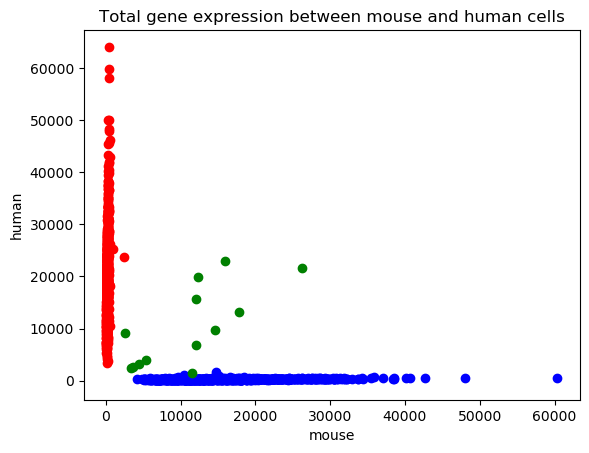

In [ ]:
plt.scatter(x=HUMAN_df['mm_total'],y=HUMAN_df['hg_total'], c='r')
plt.scatter(x=MOUSE_df['mm_total'],y=MOUSE_df['hg_total'], c='b')
plt.scatter(x=MULTIPLET_df['mm_total'],y=MULTIPLET_df['hg_total'], c='g')

plt.xlabel('mouse')
plt.ylabel('human') 
plt.title('Total gene expression between mouse and human cells')
plt.show()

#Calculating percentage or rate of misclassified UMIs

In [44]:
UMI_misclass = 0

for i in range(exp_df.shape[0]):
  
  hg_misclass = exp_df.iloc[i]['hg_total']
  mm_misclass = exp_df.iloc[i]['mm_total']

  if hg_misclass < .5*exp_df.iloc[i]['total']:
    UMI_misclass = UMI_misclass + hg_misclass 
  else:
    UMI_misclass = UMI_misclass + mm_misclass 

UMI_misclass

480221.0

In [45]:
Total = exp_df['total'].sum()
print(Total)

29502016.0


In [46]:
misclass = UMI_misclass/Total
print(misclass)

0.016277565573823836
